**Wine Quality Prediction ModeL**

**Name:** Ansmary Kurian

**Organization:** Entri Elevate

**Date:** 1/26/2025

**Overview of Problem Statement:**

The wine industry is a multibillion-dollar market, with quality assessment and classification of paramount importance in establishing the price, consumer preference, and ultimately market success. Historically, wine quality is rated by human experts by using sensory analysis. Even though this is of significant value, it remains subjective in nature, very time-consuming, and also very expensive. This necessitates an objective, consistent, and efficient method of predicting the quality and characteristics of wine.This method would bring consistency, transparency, and scalability to the evaluation of wines, therefore helping producers, sellers, and consumers alike.
**Objective:**
Eg: To develop the best Wine quality prediction model using machine learning techniques.

**Data Description:**
- Source: From UCI:- https://archive.ics.uci.edu/dataset/186/wine+quality
- Features:
fixed_acidity,
volatile_acidity,
citric_acid,
residual_sugar,
chlorides,
free_sulfur_dioxide,
total_sulfur_dioxide,
density,
pH,
sulphates,
alcohol,
quality,
Wine_type(red or white after combaining both changed to 0 as white and 1 as red )

Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error,accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, chi2

**Data Collection**

In [ ]:
white_wine=pd.read_csv('winequality-white.csv',sep=';')
red_wine=pd.read_csv('winequality-red.csv',sep=';')

In [ ]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
white_wine['wine_type']='white'
red_wine['wine_type']='red'

Combaining Both Dataset

In [ ]:
Combained = pd.concat([white_wine, red_wine], ignore_index=True)

In [ ]:
Combained.shape

(6497, 13)

In [ ]:
Combained.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type  
0      8.8        6     white  
1      9.5        6     white  
2     10.1        6     white  
3      9.9        6     white  
4      9.9        6     white

In [ ]:
#Changing to WineType values 1 and 0
Combained['wine_type']=Combained['wine_type'].replace({'white':0,'red':1})

<ipython-input-8-d3f3a9560224>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Combained['wine_type']=Combained['wine_type'].replace({'white':0,'red':1})


In [ ]:
# saved this combained dataset for later use
csv_file_path = 'winequality_Combained.csv'
Combained.to_csv(csv_file_path, index=False)

In [ ]:
Combained.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  wine_type  
0      8.8        6          0  
1      9.5        6          0  
2     10.1        6          0  
3      9.9        6          0  
4      9.9        6          0

In [ ]:
Combained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
Combained.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality    wine_type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.246114  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

**Data Cleaning and Preprocesing**

In [ ]:
Combained.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [ ]:
Combained.duplicated().sum()

1177

In [ ]:
Combained.drop_duplicates(inplace=True)
Combained.duplicated().sum()

0

In [ ]:
Combained.shape

(5320, 13)

Checking Outliers , removing and normalize the datas

> Add blockquote



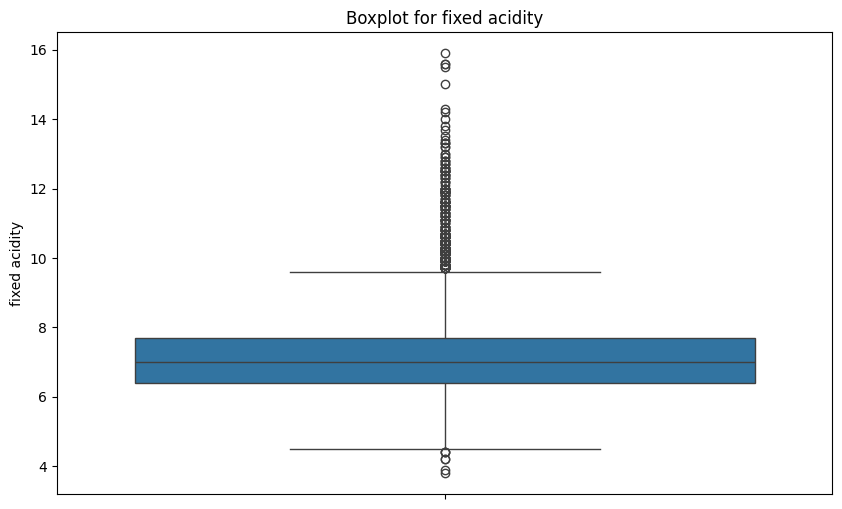

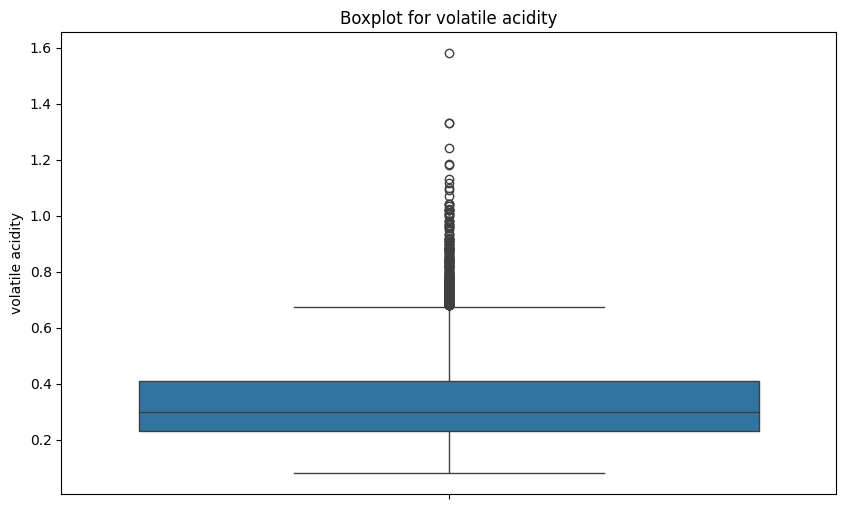

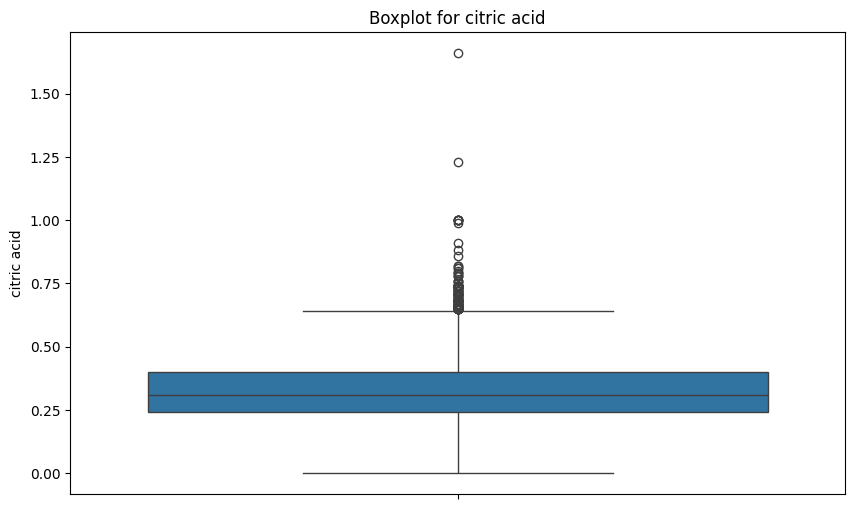

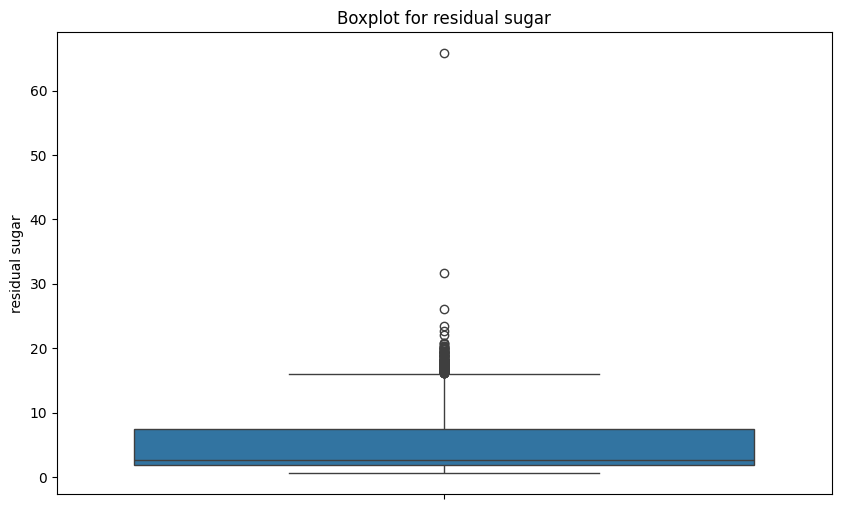

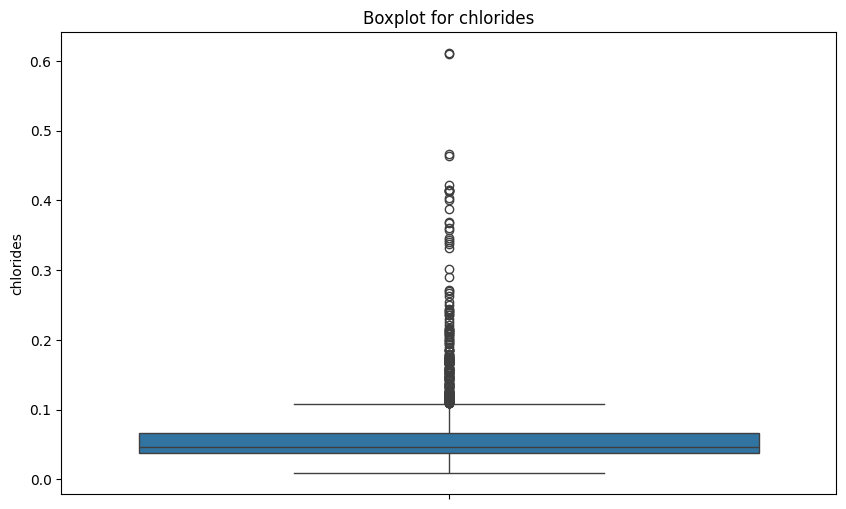

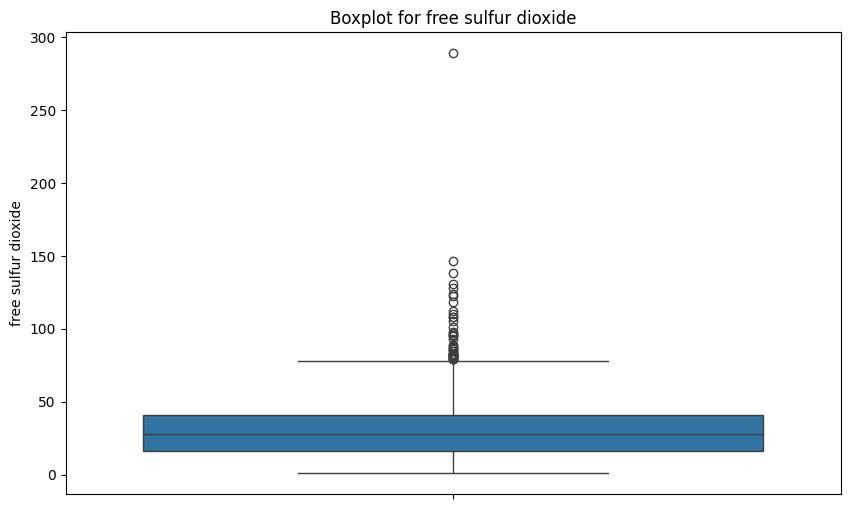

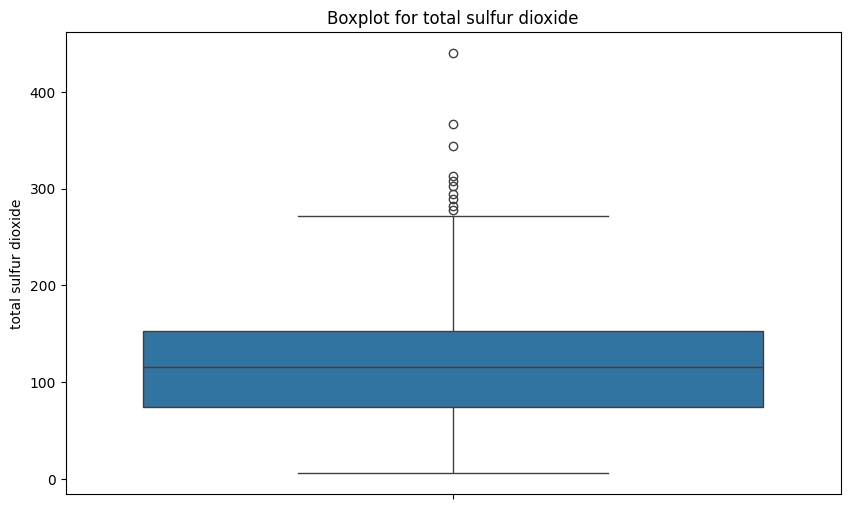

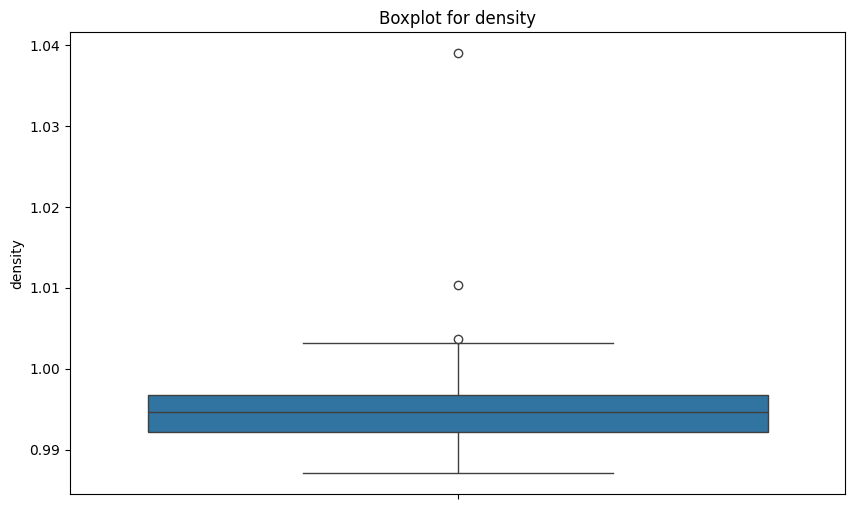

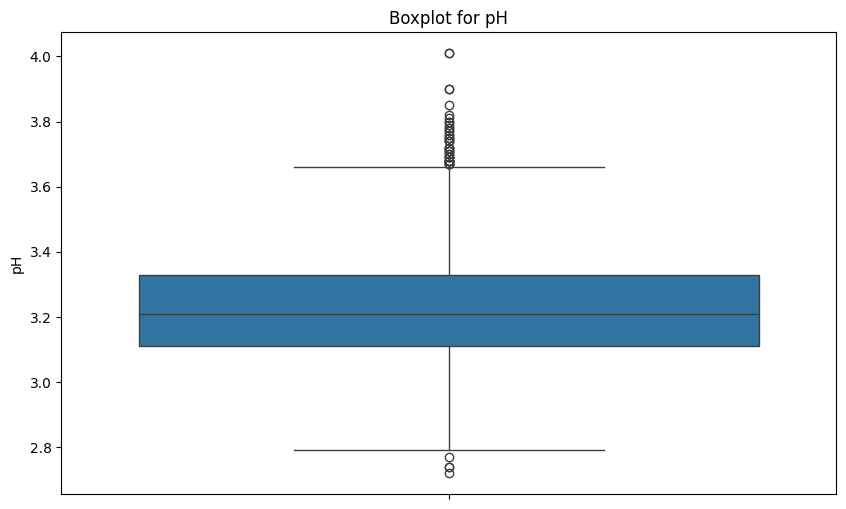

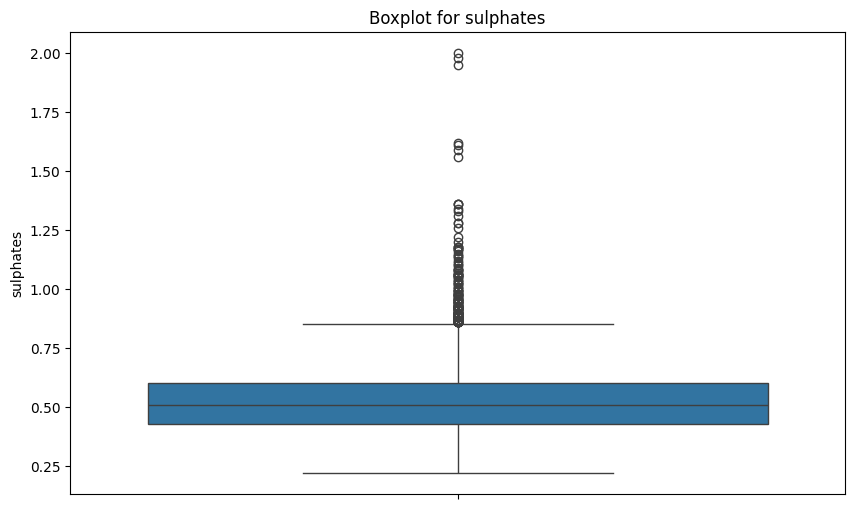

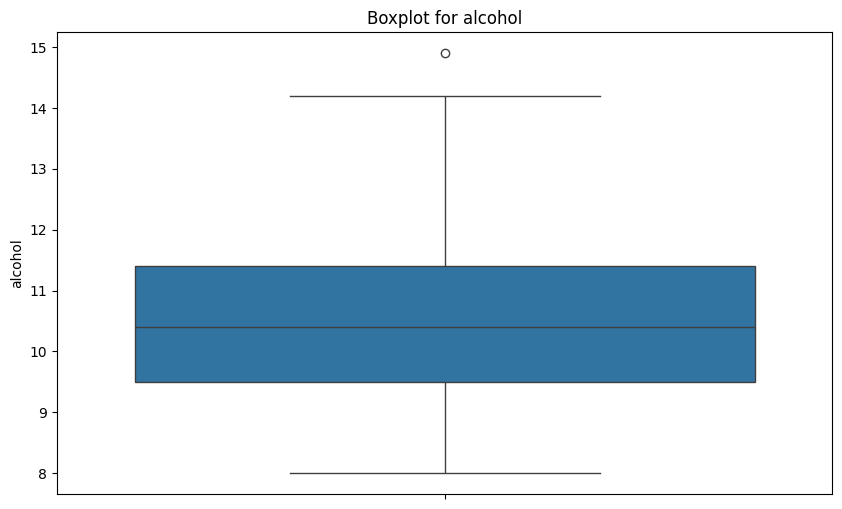

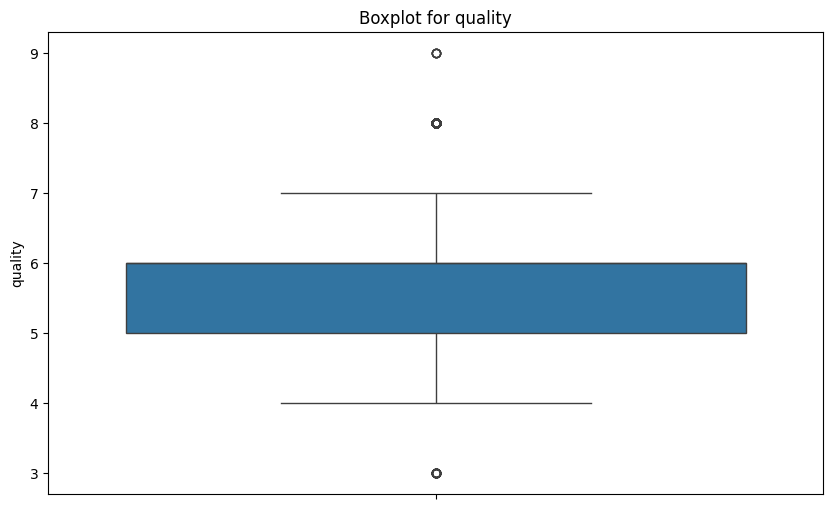

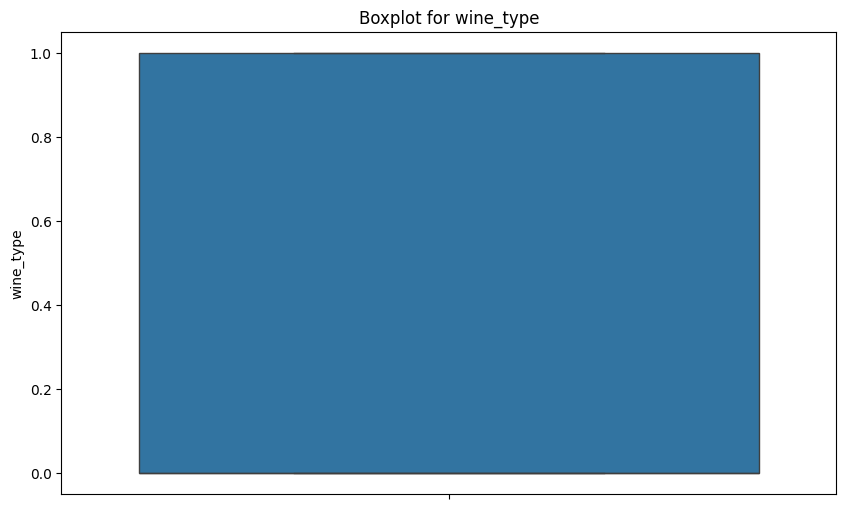

In [ ]:
# Box plot to find the outliers
for col in Combained.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(Combained[col])
  plt.title(f'Boxplot for {col}')
  plt.show()

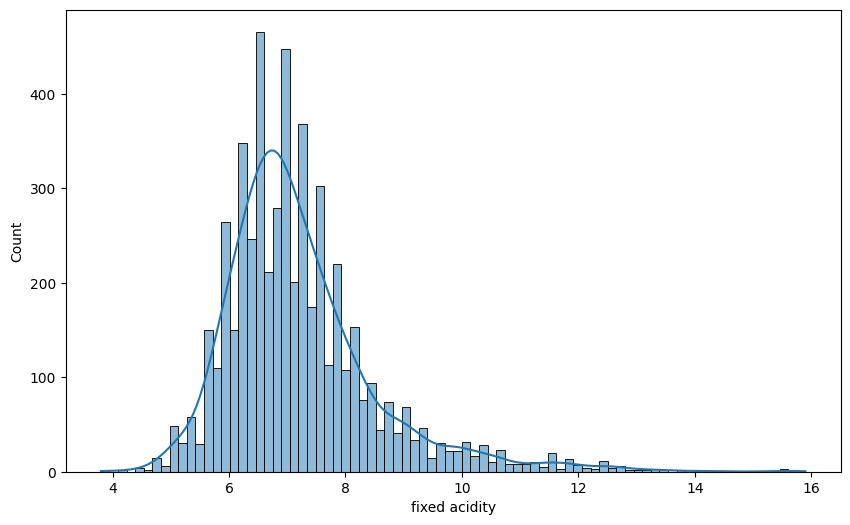

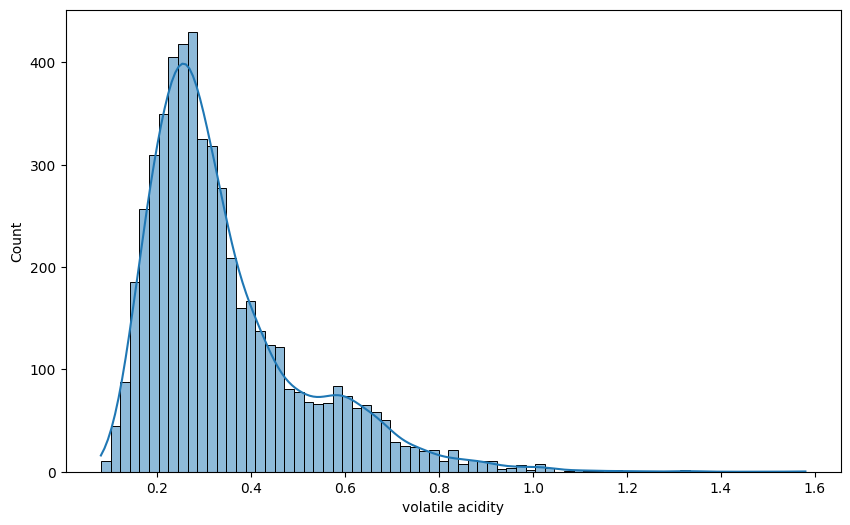

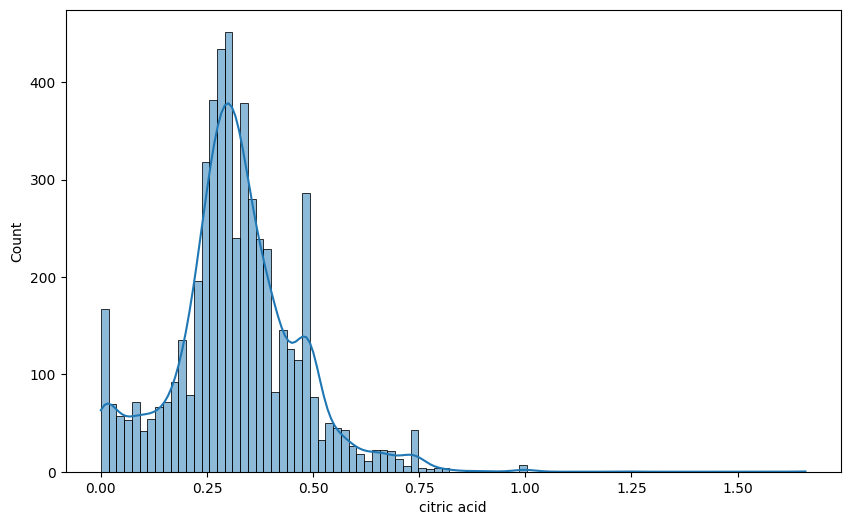

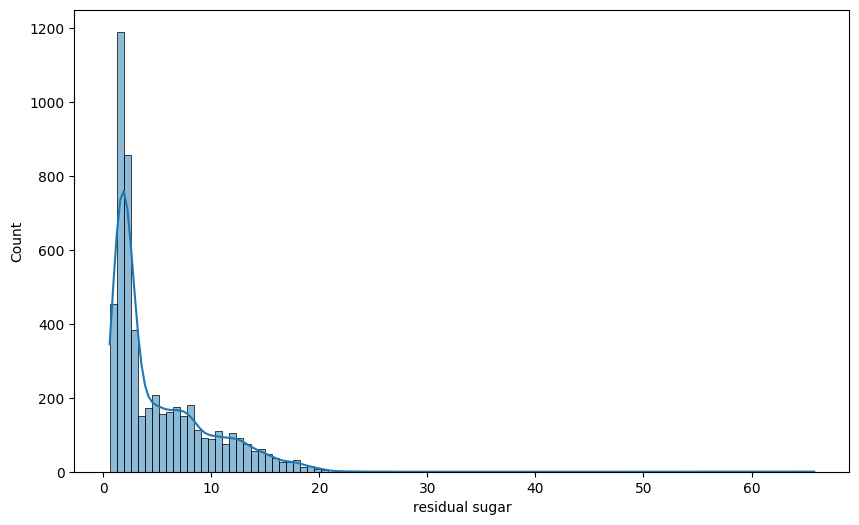

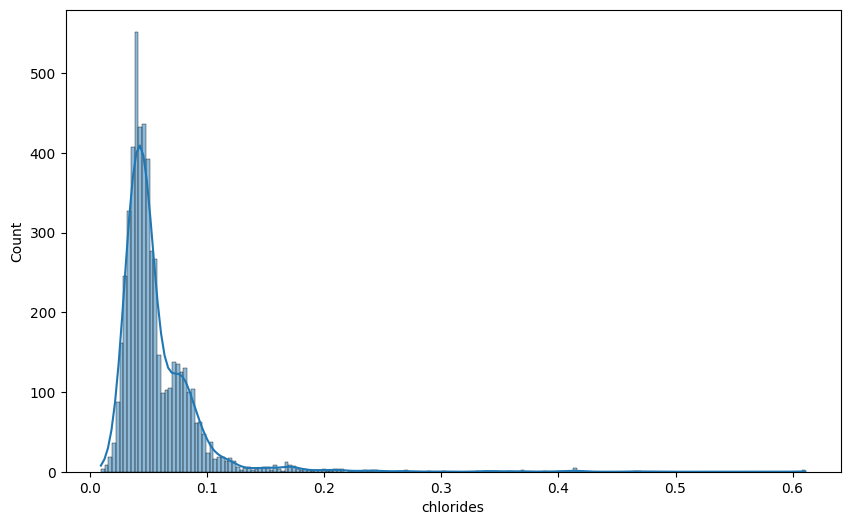

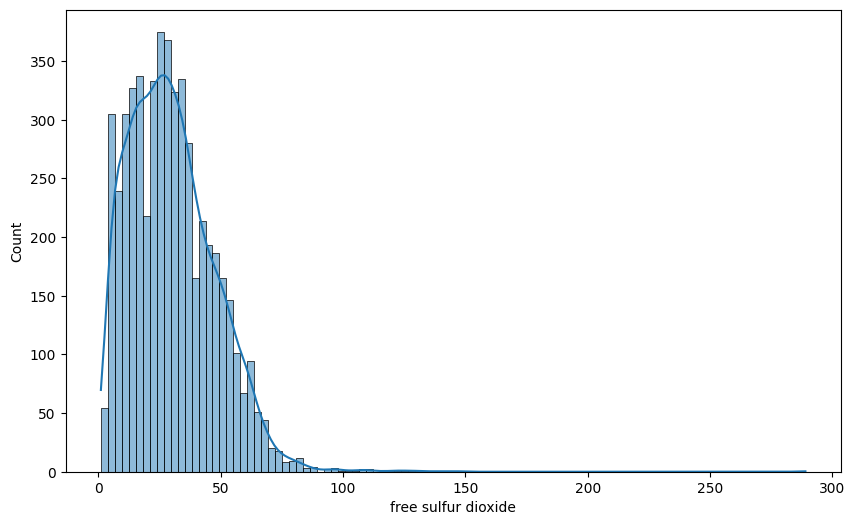

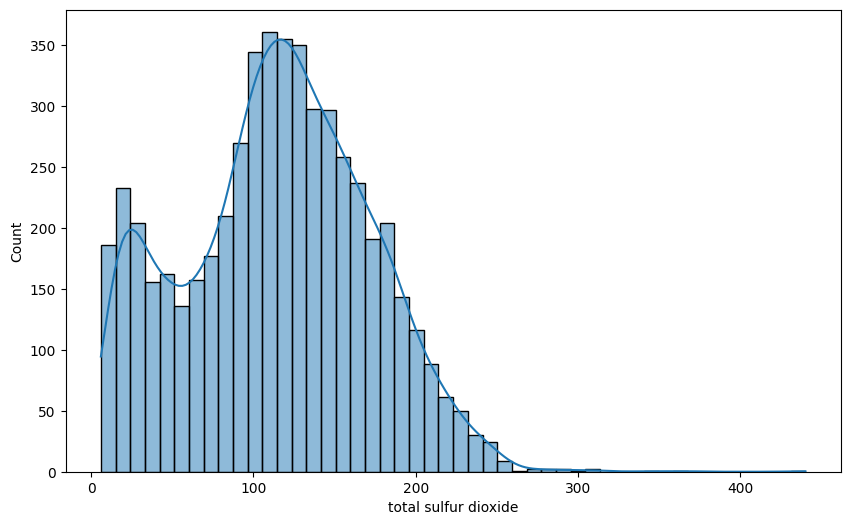

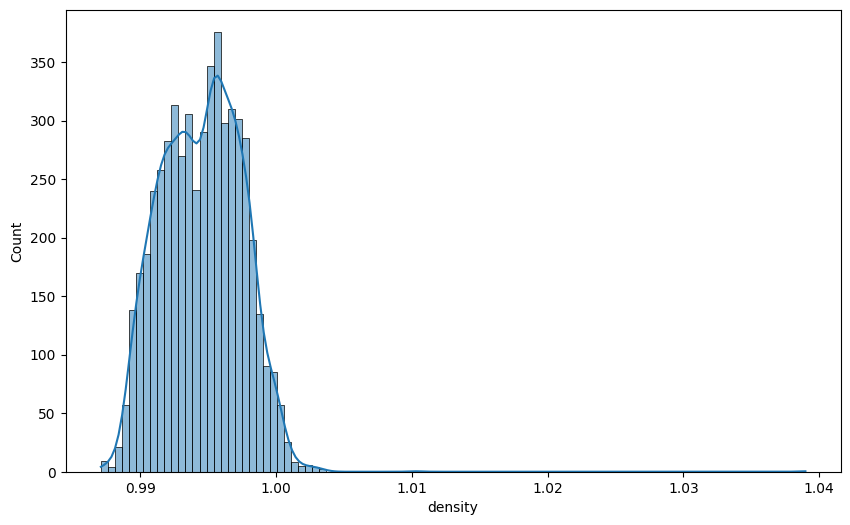

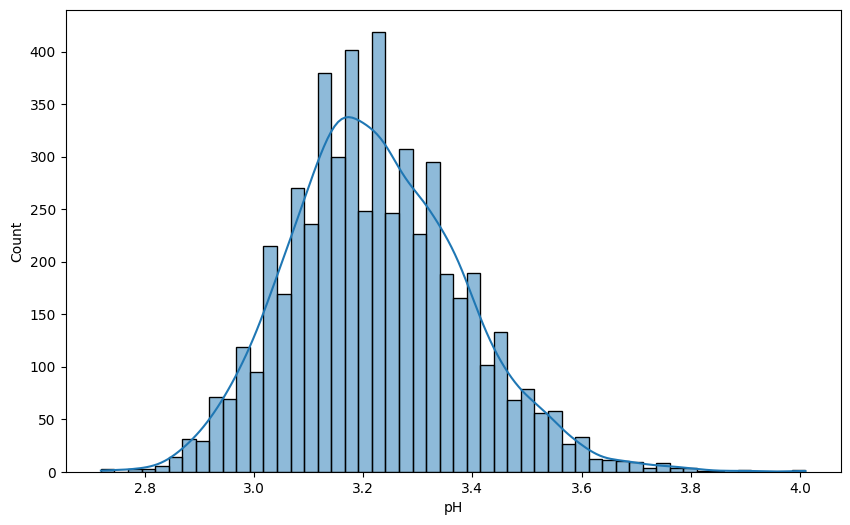

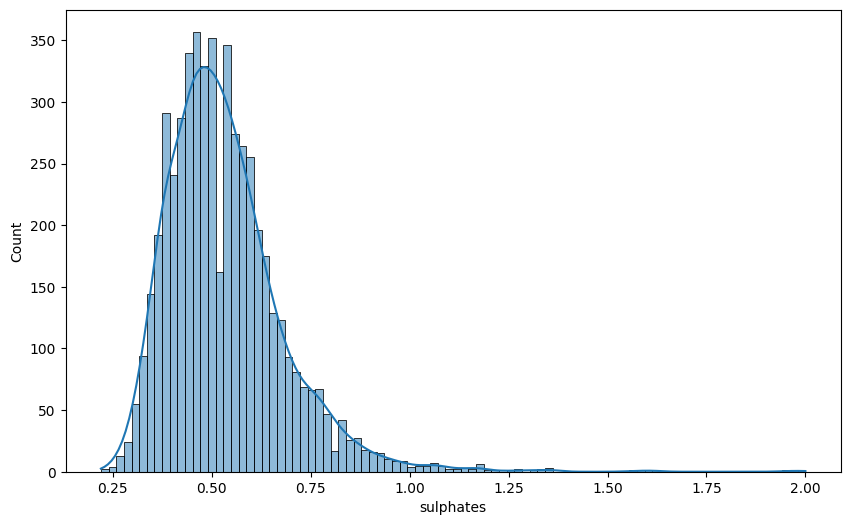

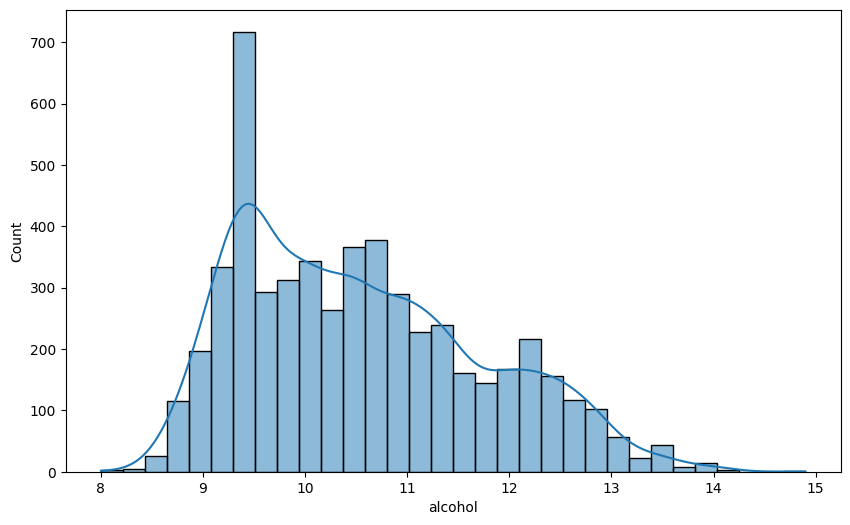

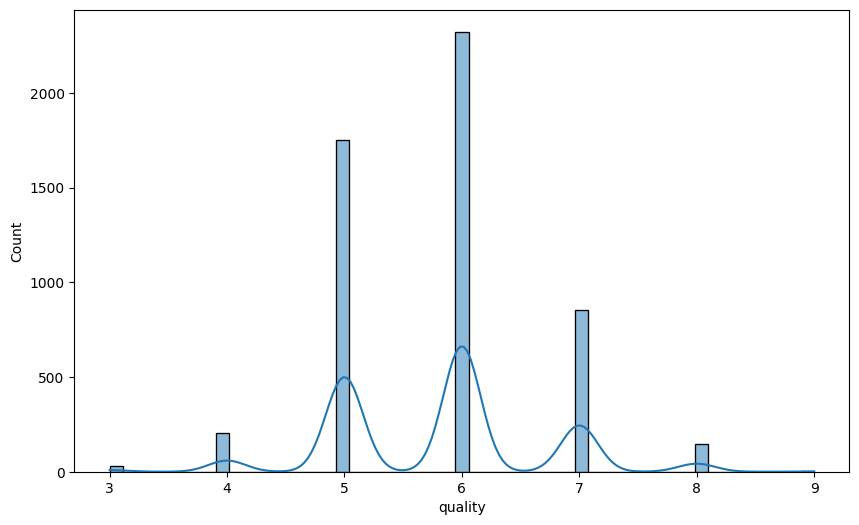

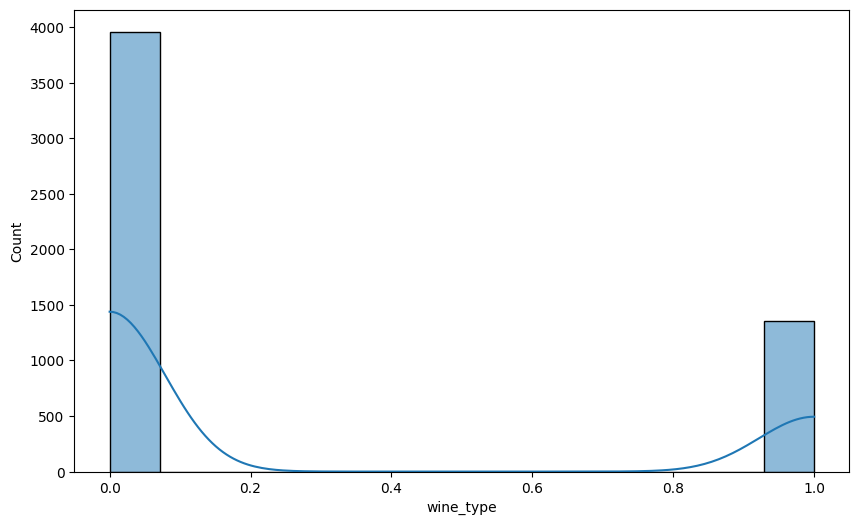

In [ ]:
for col in Combained.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(Combained[col],kde=True)
  plt.show()

In [ ]:
# Outlier function
def handle_outliers(df):
  for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
  return df

In [ ]:
#Handling the outliers
handle_outliers(Combained)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           16.05      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
6               6.2             0.320         0.16            7.00      0.045   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08            1.90      0.068   
6492            6.2             0.600         0.08            2.00      0.090   
6493            5.9             0.550         0.10            2.20      0.062   
6495            5.9             0.645         0.12            2.00      0.075   
6496            6.0             0.310         0.47            3.60      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
6491                 28.0                  38.0  0.99651  3.42       0.82   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  wine_type  
0         8.8      6.0          0  
1         9.5      6.0          0  
2        10.1      6.0          0  
3         9.9      6.0          0  
6         9.6      6.0          0  
...       ...      ...        ...  
6491      9.5      6.0          1  
6492     10.5      5.0          1  
6493     11.2      6.0          1  
6495     10.2      5.0          1  
6496     11.0      6.0          1  

[5320 rows x 13 columns]

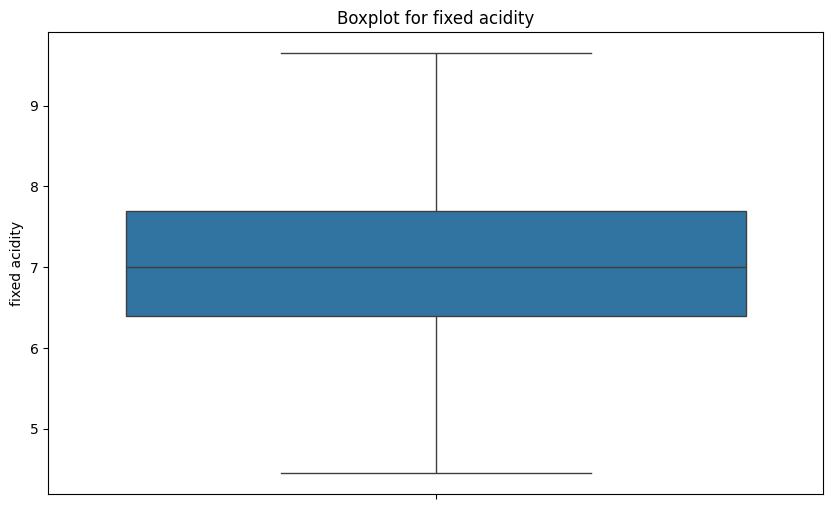

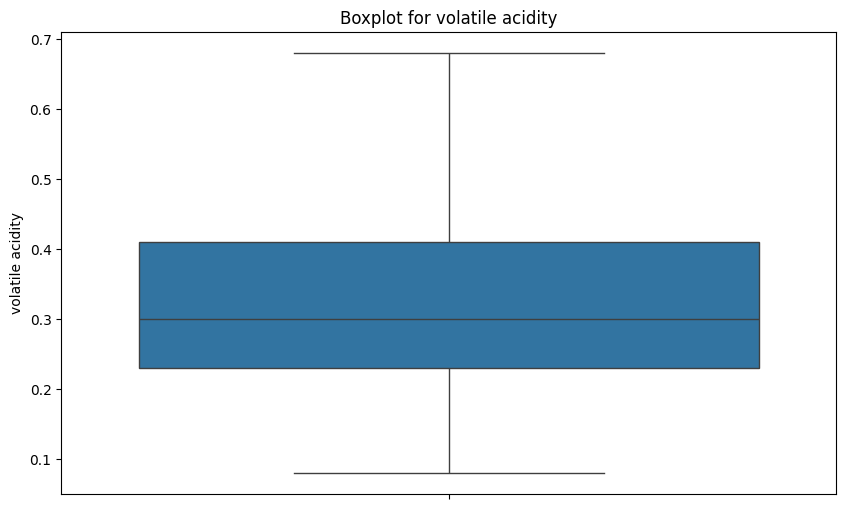

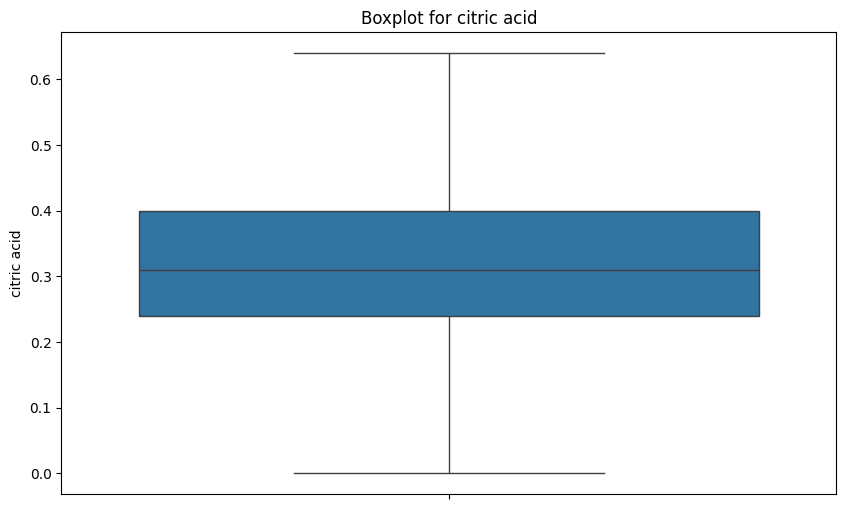

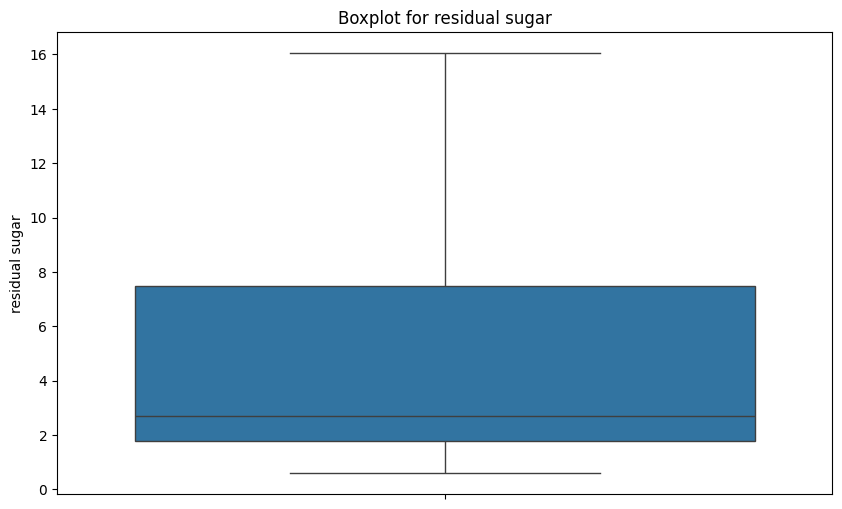

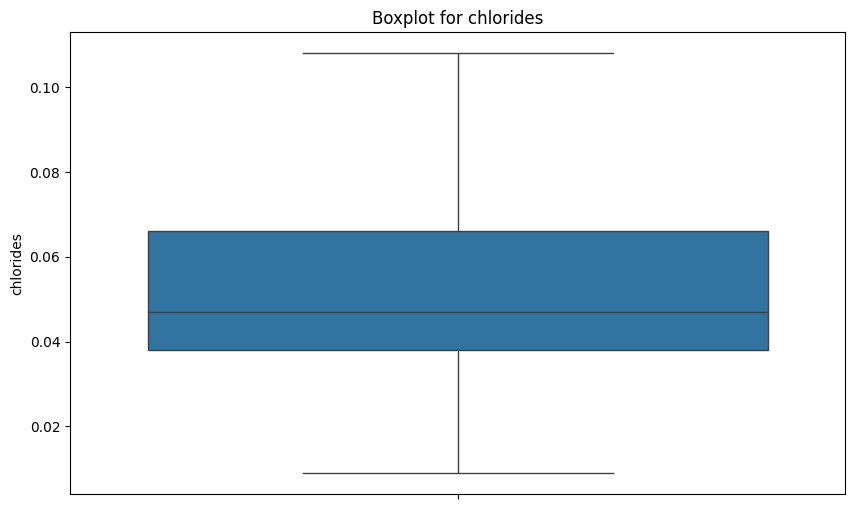

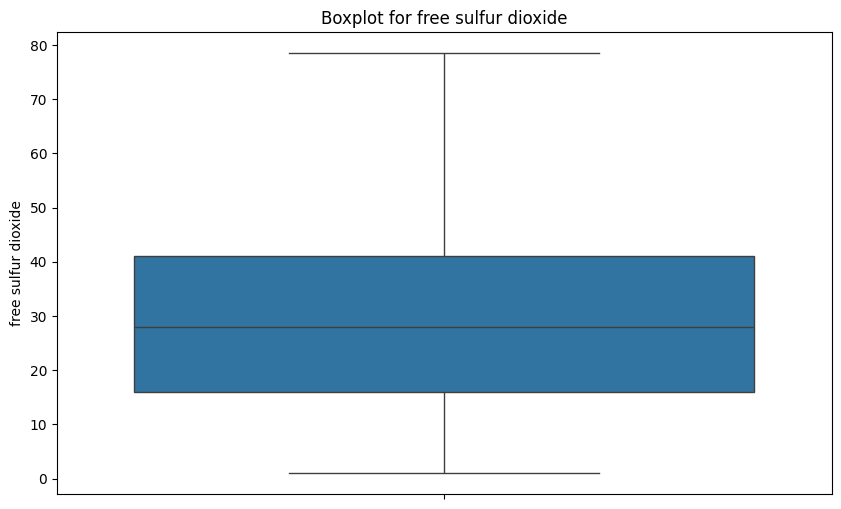

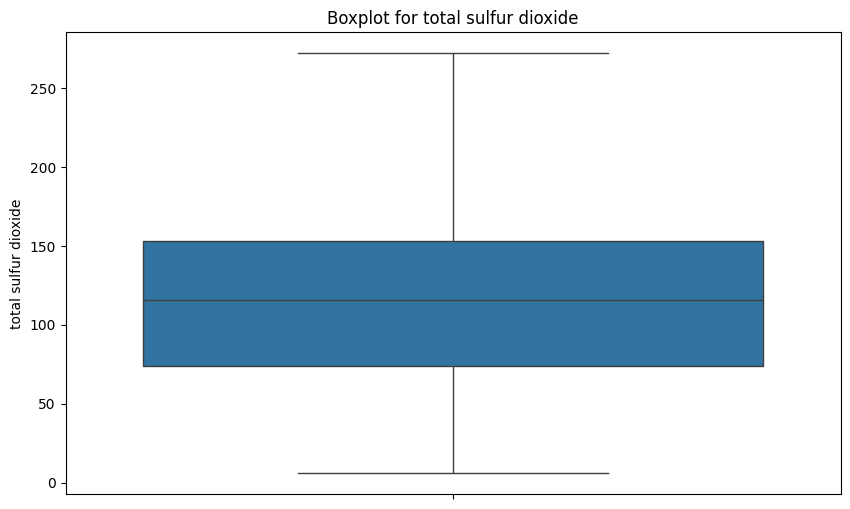

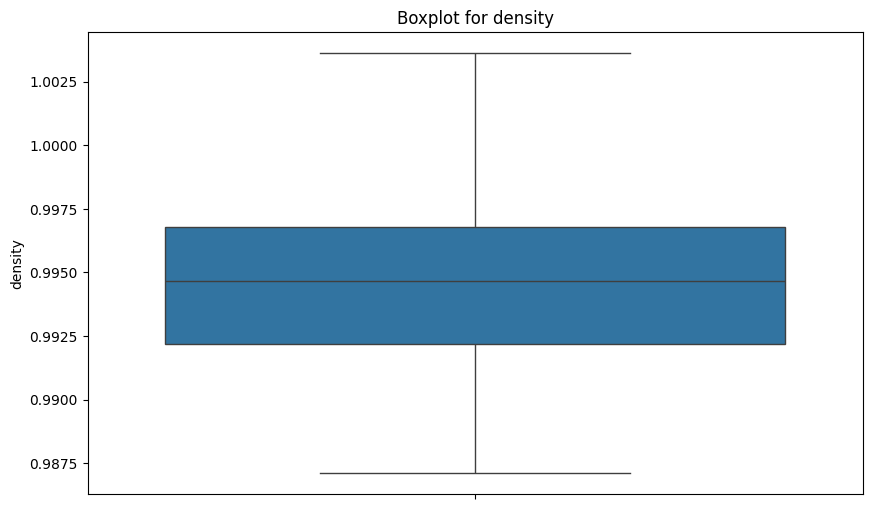

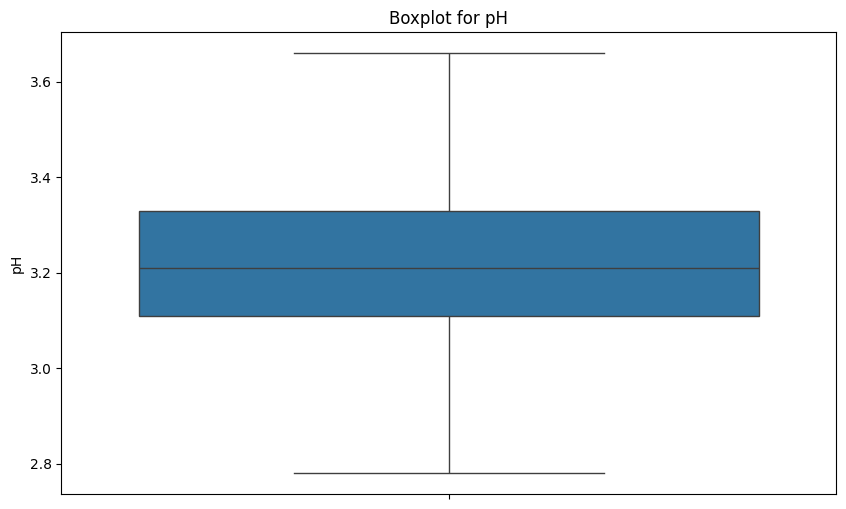

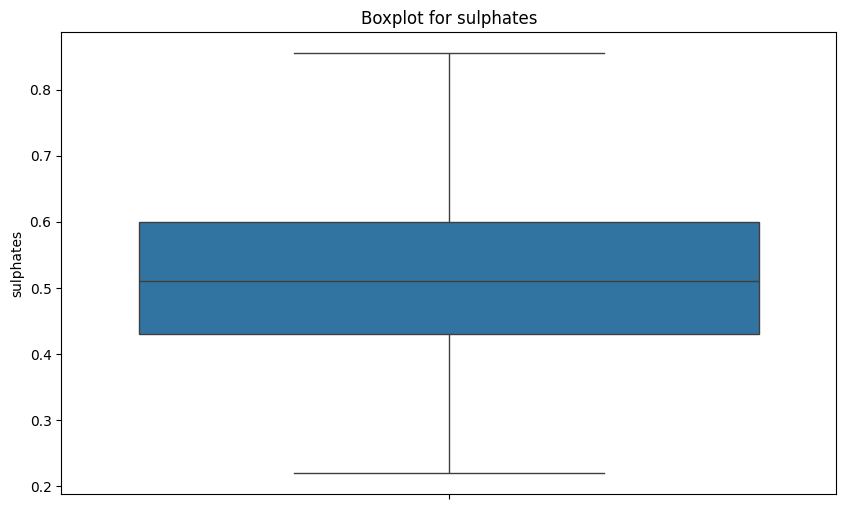

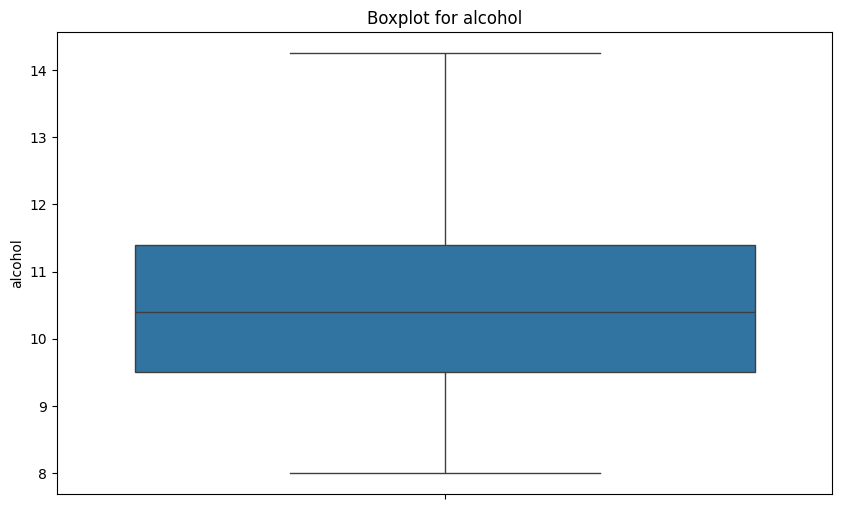

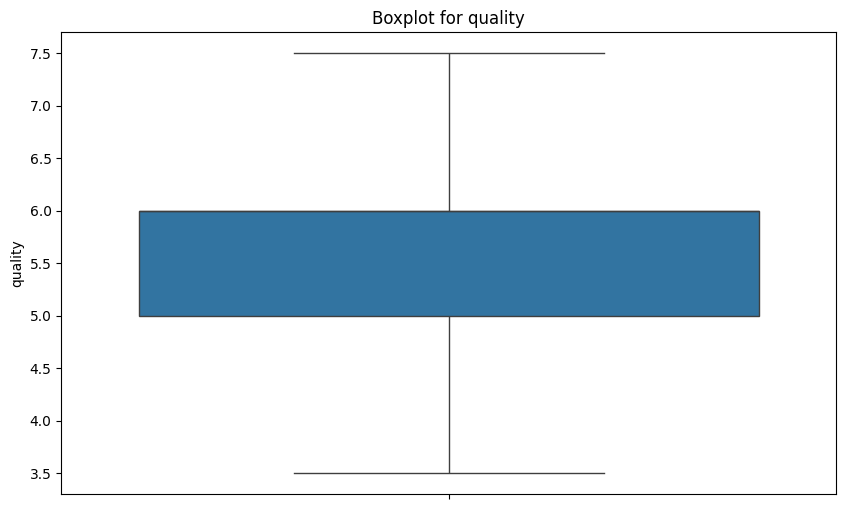

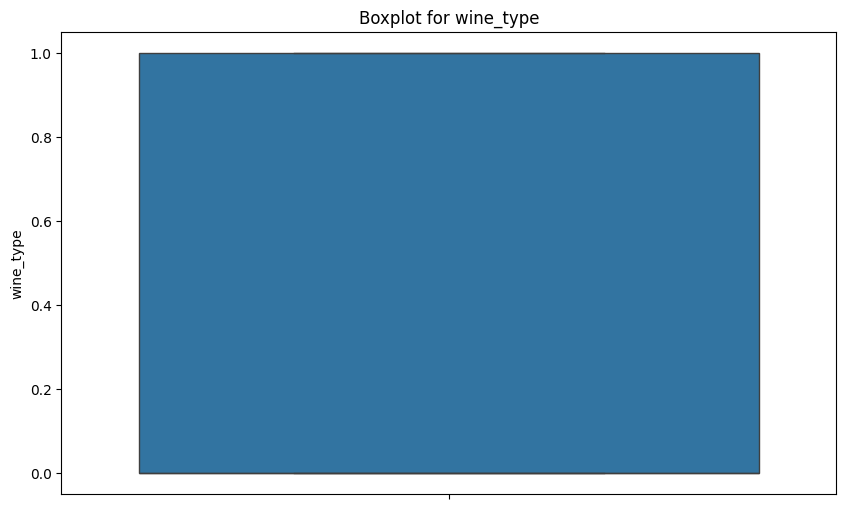

In [ ]:
# after removing outliers
for col in Combained.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(Combained[col])
  plt.title(f'Boxplot for {col}')
  plt.show()

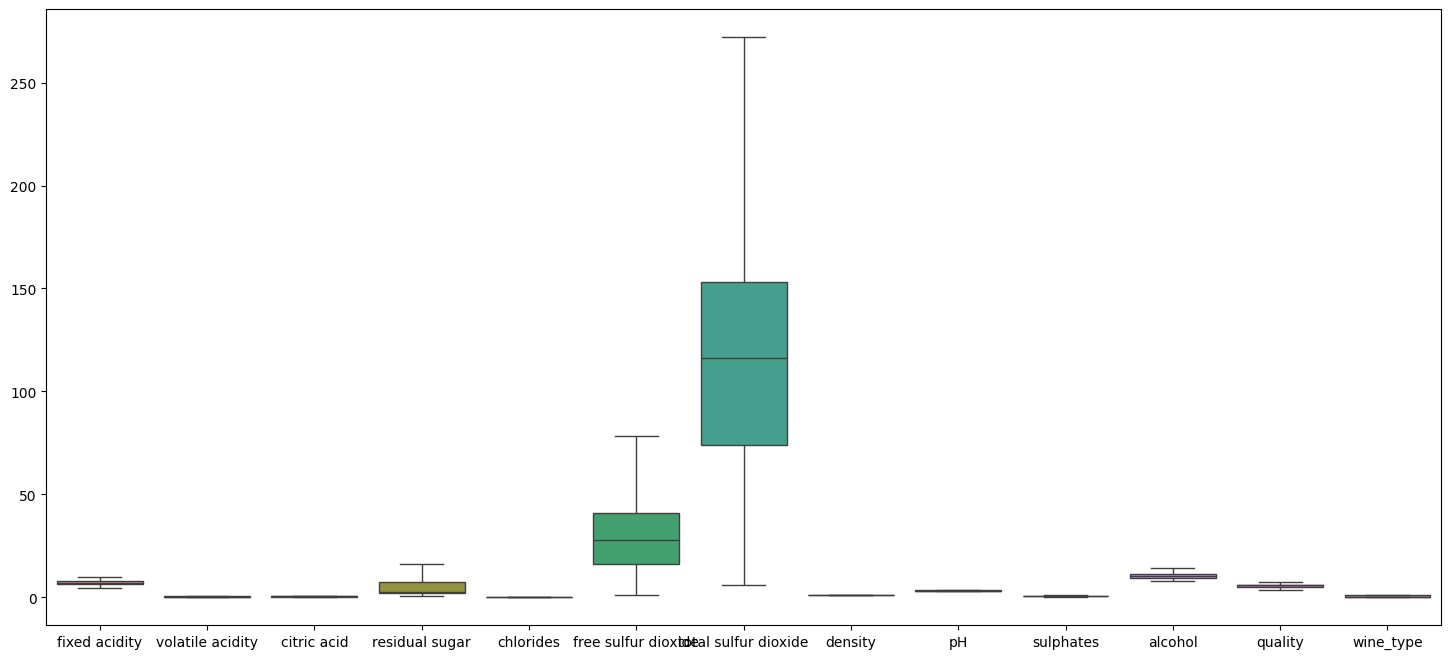

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=Combained)
plt.show()

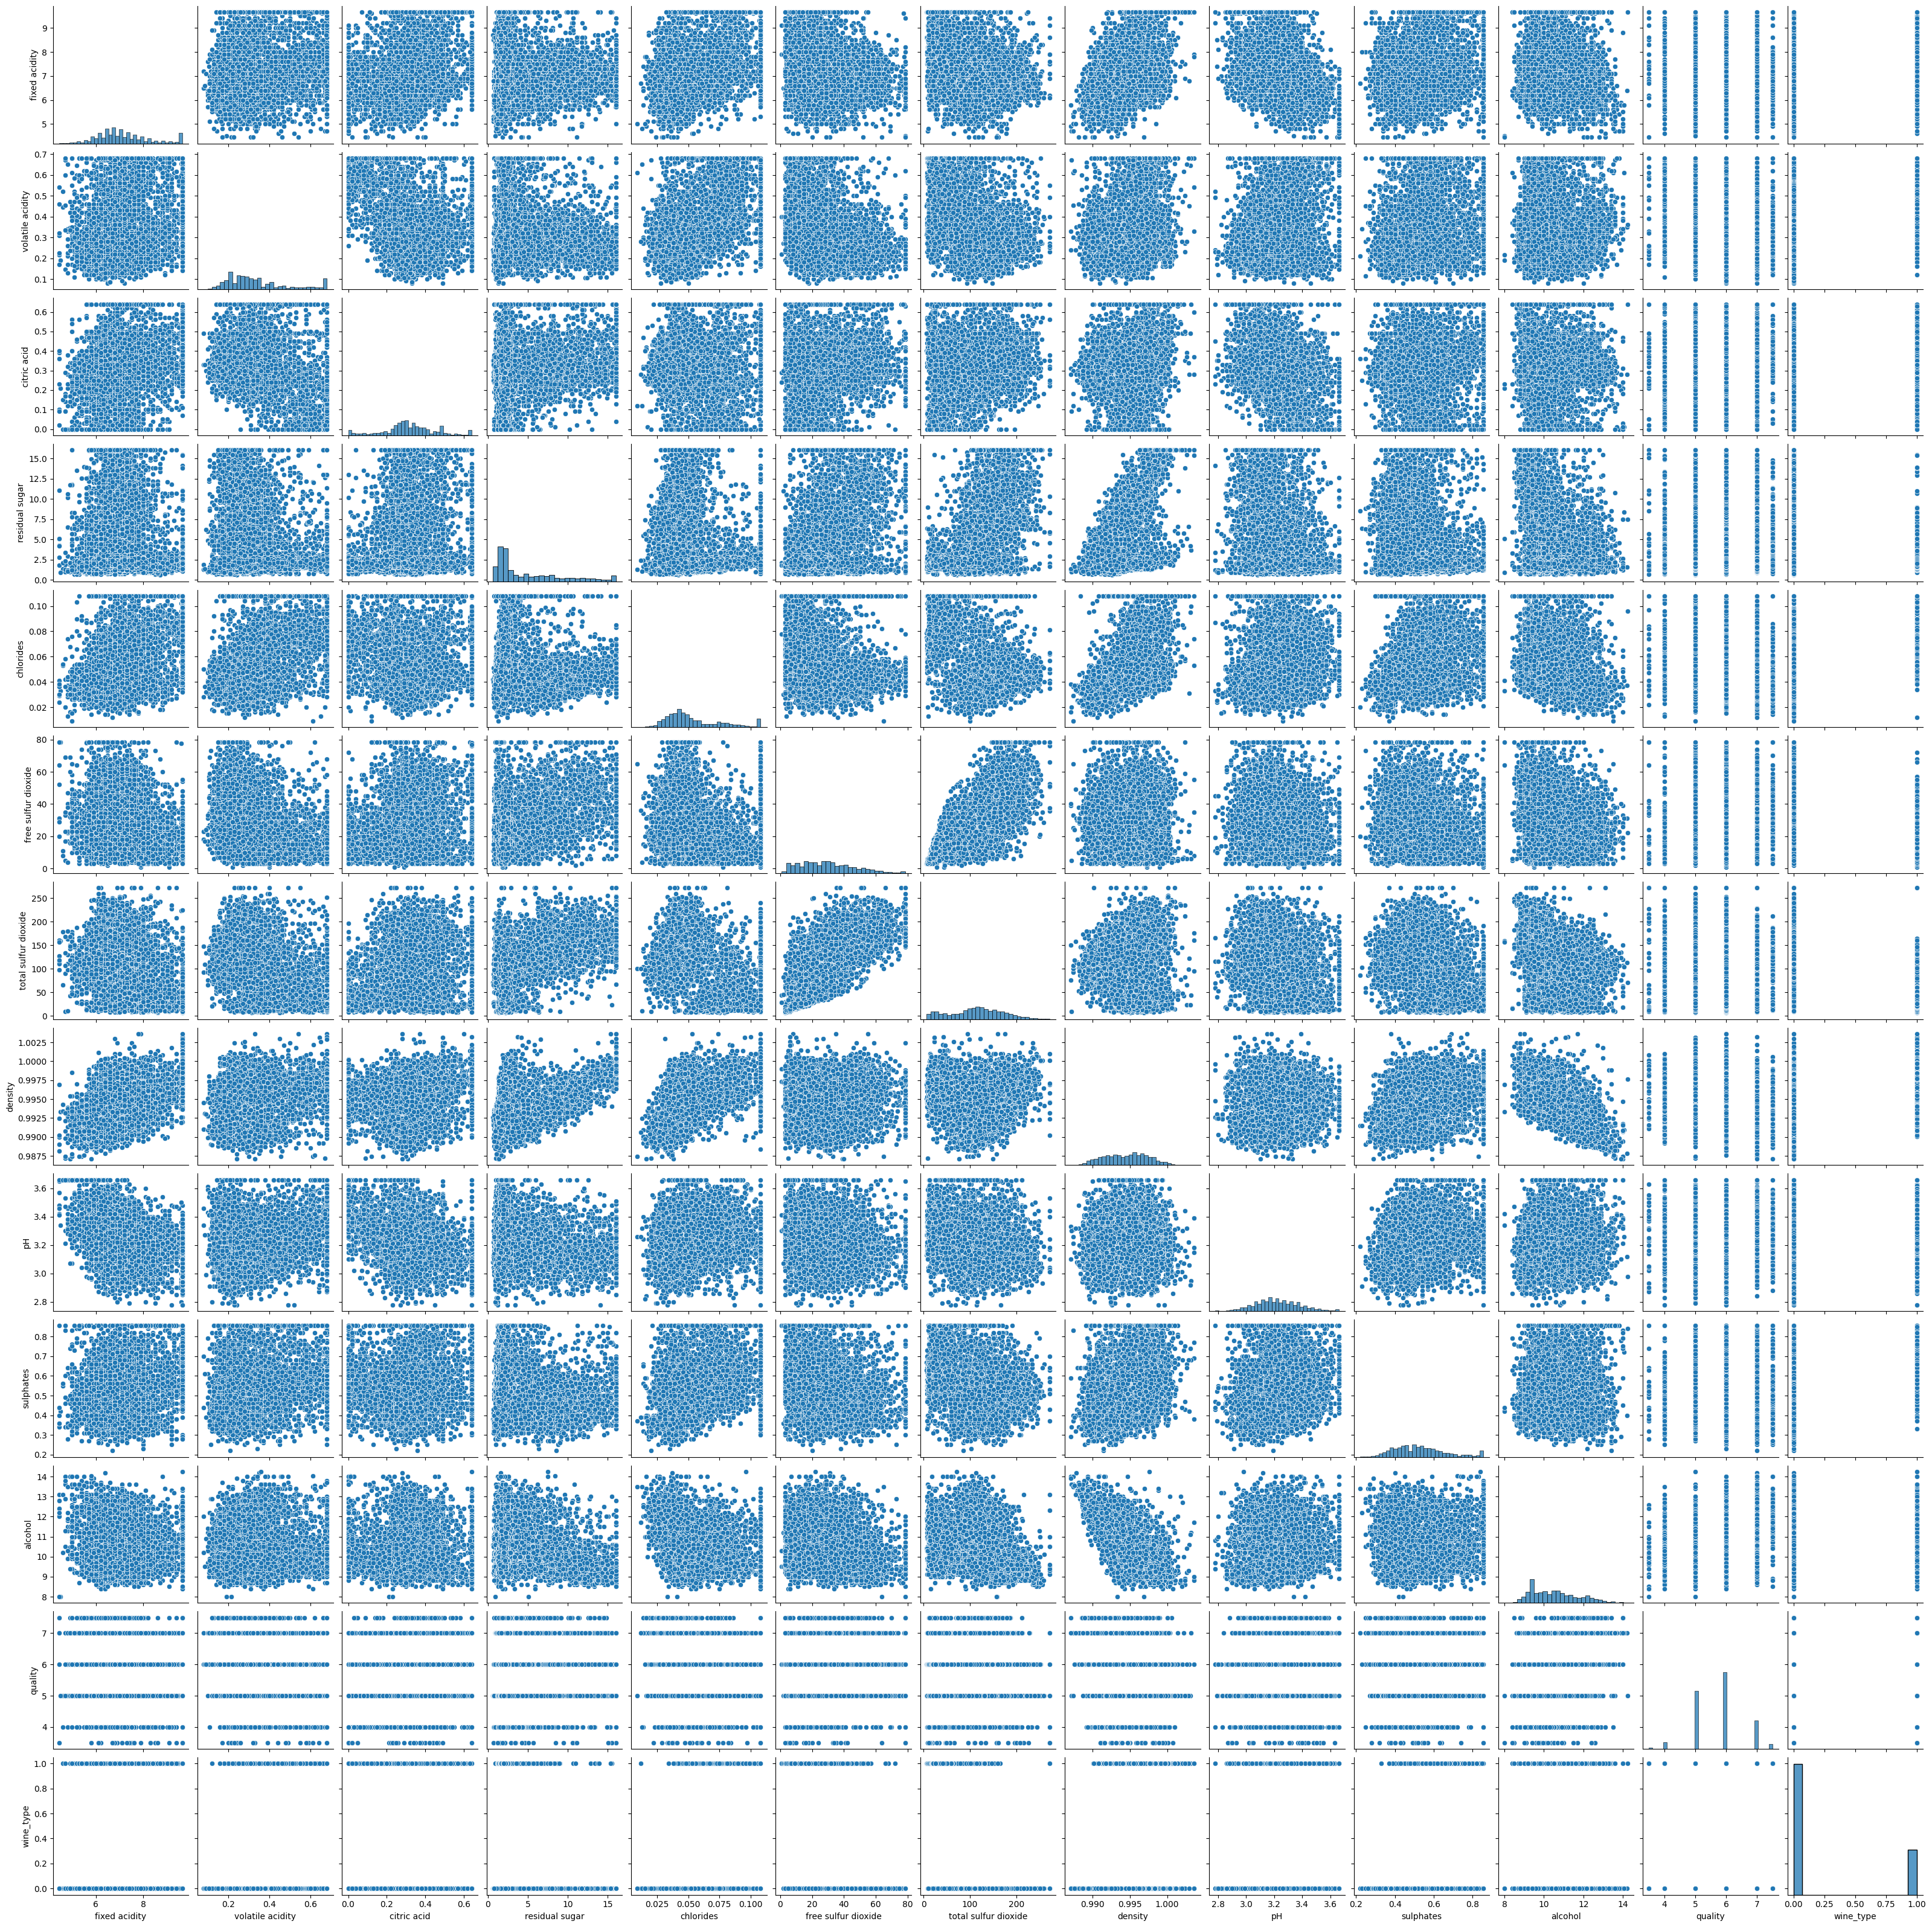

In [ ]:
sns.pairplot(Combained)
plt.show()

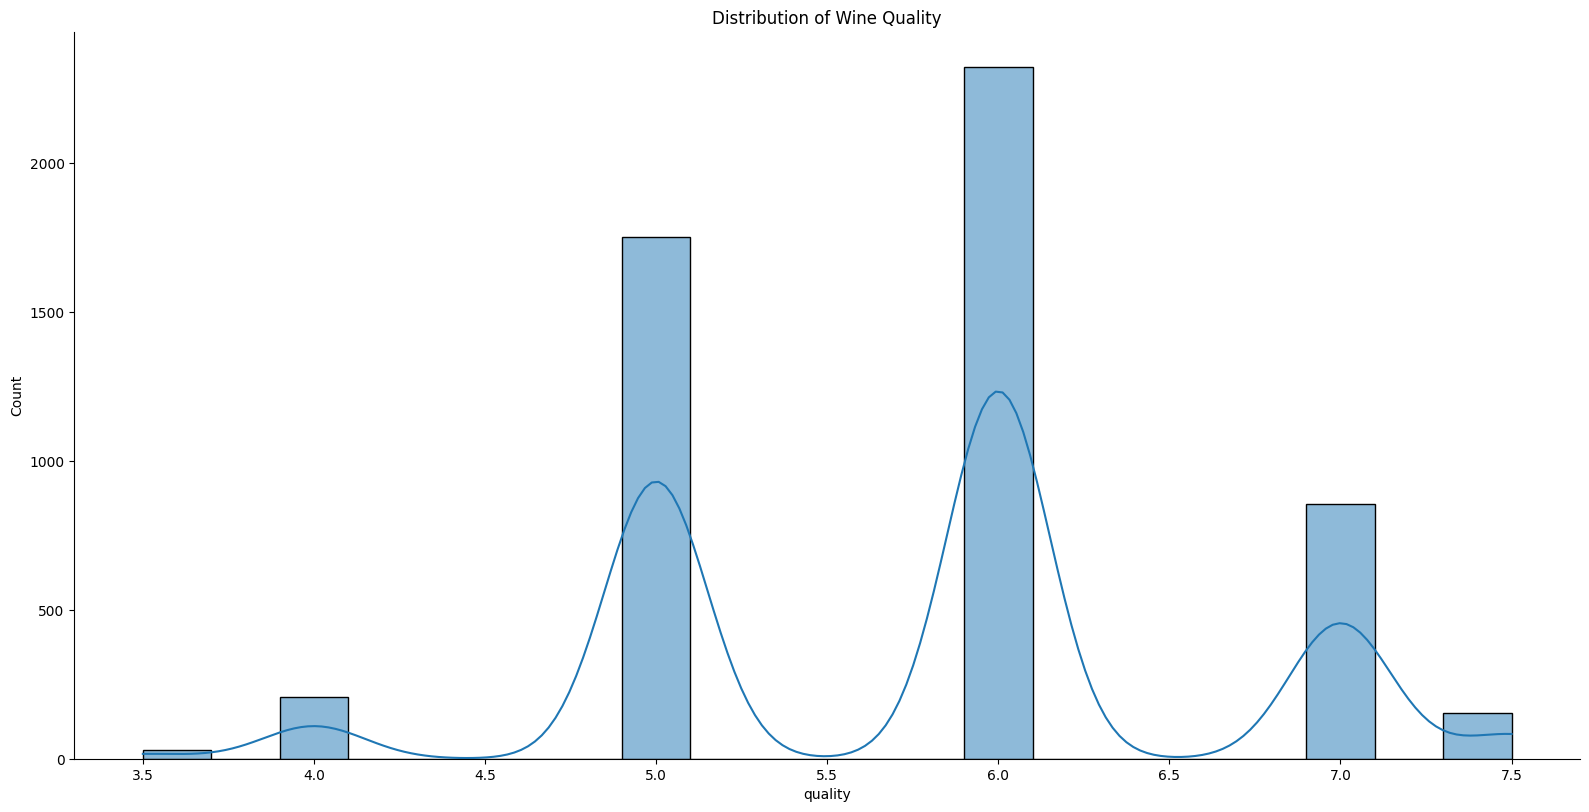

In [ ]:
sns.displot(Combained['quality'],bins=20,kde=True,height=8,aspect=2)
plt.title('Distribution of Wine Quality')
plt.show()

In [ ]:
print(Combained.skew())

fixed acidity           0.635711
volatile acidity        0.921740
citric acid            -0.023707
residual sugar          1.145924
chlorides               0.951787
free sulfur dioxide     0.550041
total sulfur dioxide    0.001156
density                 0.024934
pH                      0.270891
sulphates               0.625278
alcohol                 0.543003
quality                -0.008554
wine_type               1.121806
dtype: float64


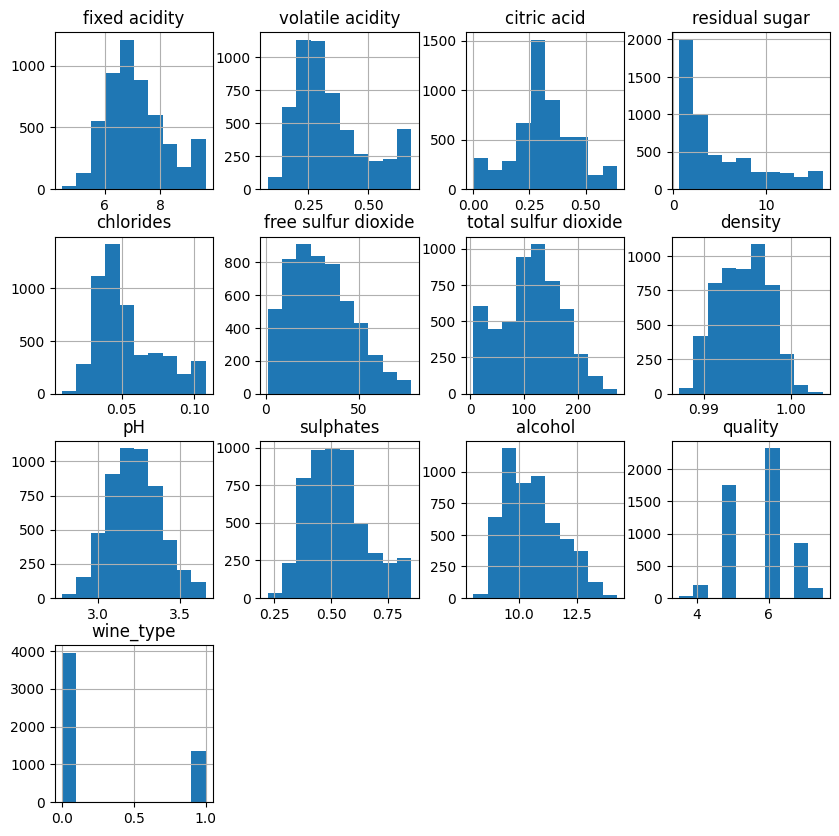

In [ ]:
Combained.hist(figsize=(10,10))
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
Combained_pt=pt.fit_transform(Combained)
Combained=pd.DataFrame(Combained_pt,columns=Combained.columns)
print(Combained.skew())

fixed acidity           0.002662
volatile acidity        0.106656
citric acid             0.007443
residual sugar          0.154881
chlorides               0.122440
free sulfur dioxide    -0.074885
total sulfur dioxide   -0.182876
density                 0.002415
pH                      0.003098
sulphates               0.026878
alcohol                 0.062445
quality                -0.014367
wine_type               1.121806
dtype: float64


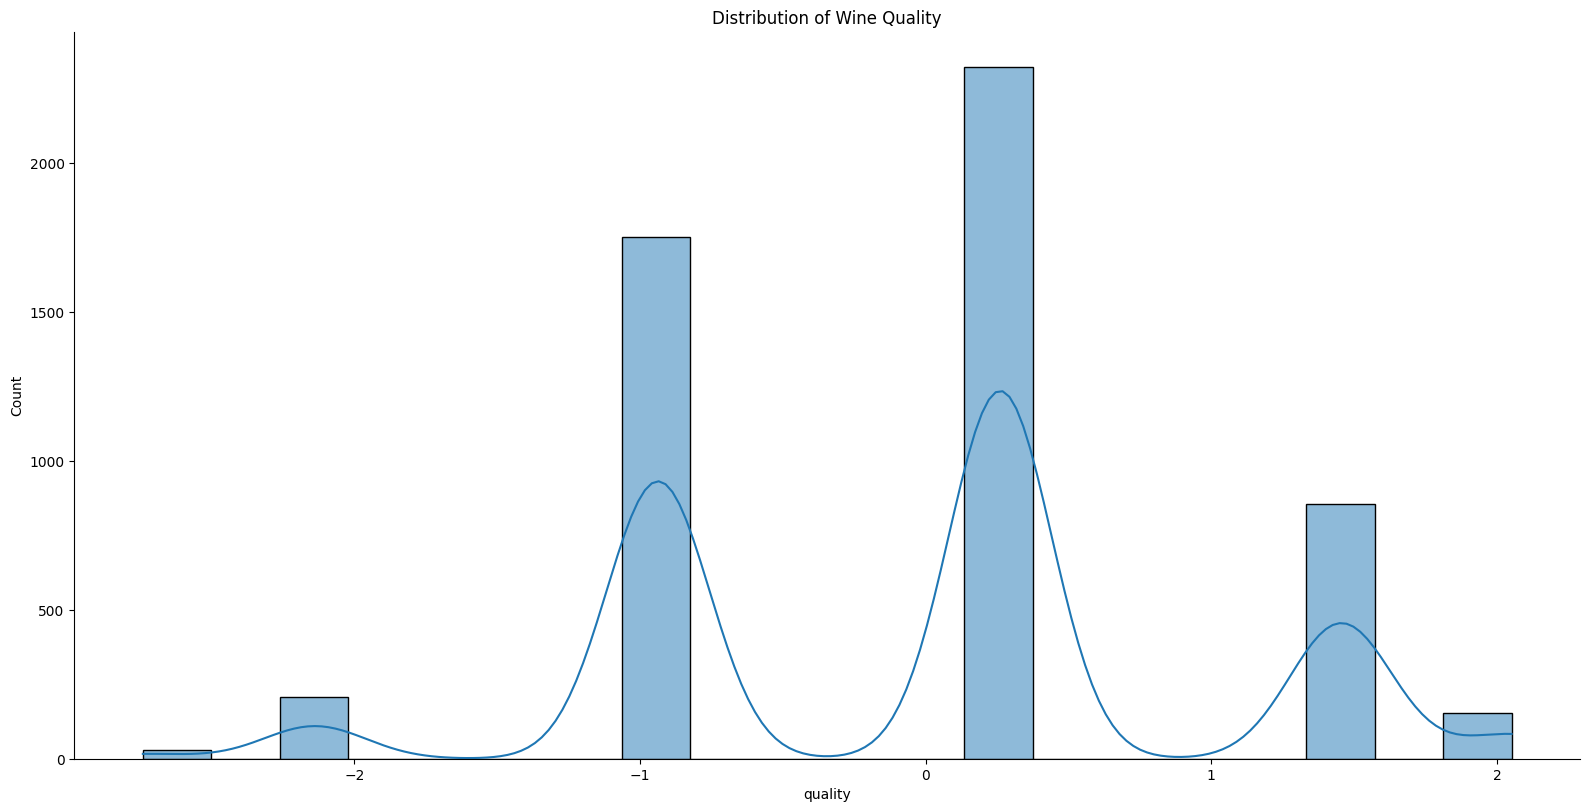

In [ ]:
sns.displot(Combained['quality'],bins=20,kde=True,height=8,aspect=2)
plt.title('Distribution of Wine Quality')
plt.show()

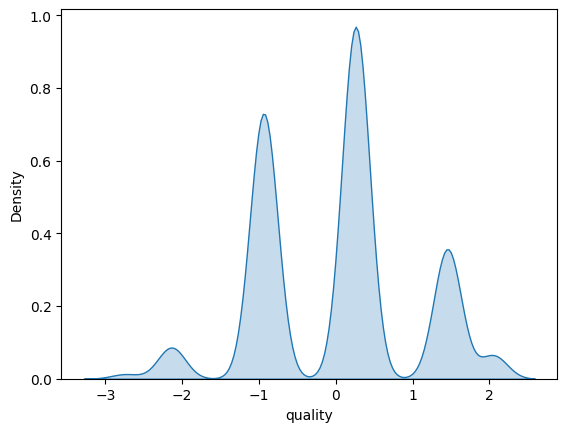

In [ ]:
sns.kdeplot(data=Combained,x='quality',fill=True)
plt.show()

<Figure size 1800x800 with 0 Axes>

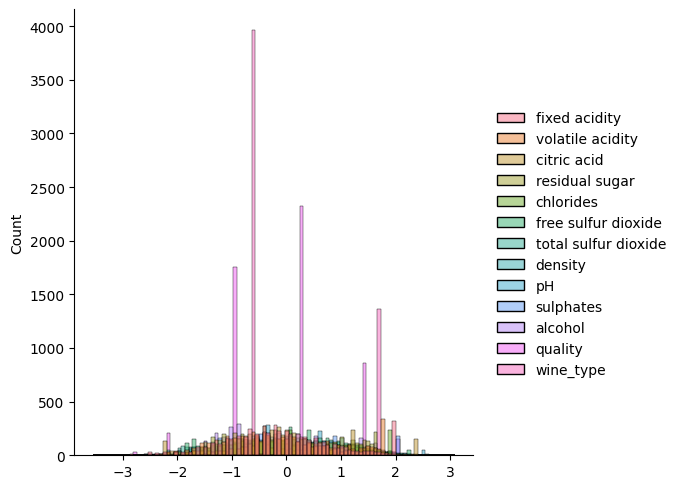

In [ ]:
plt.figure(figsize=(18,8))
sns.displot(Combained)
plt.show()

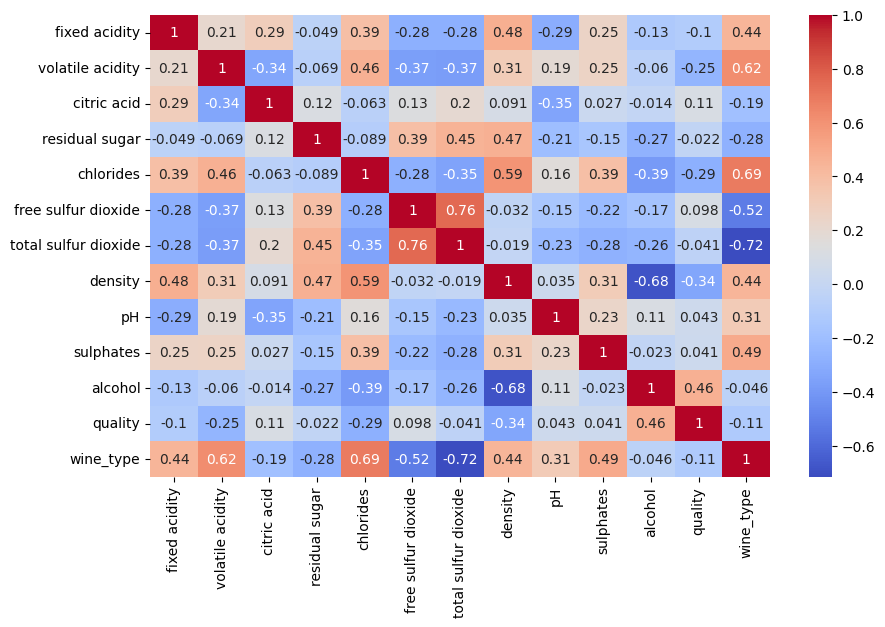

In [ ]:
#Correlation
plt.figure(figsize=(10,6))
sns.heatmap(Combained.corr(),annot=True,cmap='coolwarm')
plt.show()

**Spliting Dataset For Training and testing**

In [ ]:
x=Combained.drop('quality',axis=1)
y=Combained['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Feature Selection**

In [ ]:
Rand_re=RandomForestRegressor()
Rand_re.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#Using Random Forest Regressor Checking the Importance of Feature
importance=Rand_re.feature_importances_
features_importance=pd.DataFrame({'Features':x_train.columns,'Importance':importance})
features_importance=features_importance.sort_values(by='Importance',ascending=False)
print(features_importance)

                Features  Importance
10               alcohol    0.260630
1       volatile acidity    0.103351
5    free sulfur dioxide    0.093224
9              sulphates    0.082378
6   total sulfur dioxide    0.081226
8                     pH    0.072531
4              chlorides    0.065222
3         residual sugar    0.064285
2            citric acid    0.063657
7                density    0.058661
0          fixed acidity    0.053269
11             wine_type    0.001566


In [ ]:
# Feature selecting
selected_features=features_importance[features_importance['Importance']>0.02]['Features']
print(selected_features)

10                 alcohol
1         volatile acidity
5      free sulfur dioxide
9                sulphates
6     total sulfur dioxide
8                       pH
4                chlorides
3           residual sugar
2              citric acid
7                  density
0            fixed acidity
Name: Features, dtype: object


In [ ]:
selector=SelectFromModel(Rand_re,threshold=0.02)
selector.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestRegressor(), threshold=0.02)

In [ ]:
x_train_selected=selector.transform(x_train)
x_test_selected=selector.transform(x_test)

In [ ]:
features=x_train.columns[selector.get_support()]
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
print(x_train_selected.shape)
print(x_test_selected.shape)

(4256, 11)
(1064, 11)


**Feature Scaling**

In [ ]:
Scaler=MinMaxScaler()
x_train_scaled=Scaler.fit_transform(x_train_selected)
x_test_scaled=Scaler.transform(x_test_selected)

In [ ]:
normalized=pd.DataFrame(x_train_scaled,columns=features)
normalized.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.601290          0.415488     0.651491        0.214240   0.579718   
1       0.721463          0.463019     1.000000        0.916458   0.603284   
2       0.601290          0.604927     0.354299        0.674200   0.742934   
3       0.290992          0.309151     0.416549        0.496957   0.625864   
4       0.927222          0.827167     0.478973        0.509529   0.942987   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.488733              0.501643  0.323876  0.416305   1.000000   
1             0.642414              0.527064  0.654819  0.291164   0.387331   
2             0.774722              0.890144  0.534434  0.675947   0.739812   
3             0.539756              0.420237  0.317747  0.817159   0.672899   
4             0.418466              0.397588  0.675787  0.675947   0.776990   

    alcohol  
0  0.652711  
1  0.237452  
2  0.403138  
3  0.556812  
4  0.403138

**Build the ML Model**

In [ ]:
models={
    'Linear Regression':LinearRegression(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Support Vector Regressor':SVR(),
    'K-Nearest Neighbors Regressor':KNeighborsRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor()

}
result={}

**Model Evaluation**

In [ ]:
from re import M
def evaluate_model(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(MSE)
  r2=r2_score(y_test,y_pred)
  return MSE,MAE,RMSE,r2

In [ ]:
for name,model in models.items():
  mse,mae,rmse,r2=evaluate_model(model,x_train,y_train,x_test,y_test)
  result[name]={
      'MSE':mse,
      'MAE':mae,
      'RMSE':rmse,
      'R2 Score':r2
  }
  print(f'Model Name: {model.__class__.__name__}')
  print(f'MSE: {mse}')
  print(f'MAE: {mae}')
  print(f'RMSE: {rmse}')
  print(f'R2 Score: {r2}')
  print('-'*50)

Model Name: LinearRegression
MSE: 0.6686199498798289
MAE: 0.6413655586101463
RMSE: 0.817691842860028
R2 Score: 0.3430338991783365
--------------------------------------------------
Model Name: RandomForestRegressor
MSE: 0.6060127325649822
MAE: 0.6101263864132306
RMSE: 0.7784681962450246
R2 Score: 0.4045498911107067
--------------------------------------------------
Model Name: SVR
MSE: 0.6181629186602223
MAE: 0.6021732928460272
RMSE: 0.7862333741709406
R2 Score: 0.3926114791852442
--------------------------------------------------
Model Name: KNeighborsRegressor
MSE: 0.7104053059356968
MAE: 0.6503819254527508
RMSE: 0.842855447829399
R2 Score: 0.3019768495877546
--------------------------------------------------
Model Name: GradientBoostingRegressor
MSE: 0.6203246432329015
MAE: 0.6236654331355062
RMSE: 0.7876069090814919
R2 Score: 0.39048743283601595
--------------------------------------------------


In [ ]:
best_model=max(result,key=lambda x:result[x]['R2 Score'])
print(f'Best Model: {best_model}')

Best Model: Random Forest Regressor


In [ ]:
model_train=RandomForestRegressor(n_estimators=100,random_state=42,max_depth=5)
model_train.fit(x_train_scaled,y_train)
y_train_pred=model_train.predict(x_train_scaled)
y_test_pred=model_train.predict(x_test_scaled)
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')

MSE Train: 0.5976540394632375
MSE Test: 0.6603244816095319


**Hyperparameter Tuning**

In [ ]:
param_grid={
    'n_estimators':[100,200,300],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_search=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print(f'Best Score: {best_score}')
print(f'Best Parameters: {best_params}')

Best Score: -0.6035777545102132
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
#model evaluating
model_best=RandomForestRegressor(**best_params ,random_state=42)
model_best.fit(x_train_scaled,y_train)

y_test_pred=model_best.predict(x_test_scaled)
mse_test=mean_squared_error(y_test,y_test_pred)
r2_test=r2_score(y_test,y_test_pred)
print(f'MSE Test: {mse_test}')
print(f'R2 Score Test: {r2_test}')

MSE Test: 0.5935884529805177
R2 Score Test: 0.41675761915649845


**Saving Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'Wine_Quality_Prediction_Model.joblib')

['Wine_Quality_Prediction_Model.joblib']

In [ ]:
loaded_model=joblib.load('Wine_Quality_Prediction_Model.joblib')

In [ ]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('scaler',Scaler),
    ('model',model_best)
])
pipeline.fit(x_train_scaled,y_train)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestRegressor(max_features='log2', n_estimators=300,
                                       random_state=42))])

In [ ]:
files='Wine_Quality_Prediction_Pipeline.joblib'
joblib.dump(pipeline,files)


['Wine_Quality_Prediction_Pipeline.joblib']

**Testing Model with Unseen Data**

In [ ]:
data=Combained.drop('wine_type',axis=1)
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.014928         -0.312982     0.313834        1.656135  -0.244863   
1      -0.751739         -0.049766     0.169474       -0.970460  -0.012333   
2       0.934084         -0.222172     0.603116        0.873109   0.042765   
3       0.174656         -0.710206     0.025303        1.089828   0.443840   
4      -0.867505          0.111188    -1.120898        0.888549  -0.244863   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.923800              0.981207  2.209819 -1.481992  -0.539029   
1            -0.920297              0.351558 -0.176299  0.521577  -0.184653   
2             0.160350             -0.254045  0.203107  0.275494  -0.632349   
3             1.014984              1.239502  0.375012 -0.169895  -1.026196   
4             0.160350              0.419050  0.134248 -0.235107  -0.358164   

    alcohol   quality  
0 -1.785360  0.260575  
1 -0.897428  0.260575  
2 -0.263532  0.260575  
3 -0.463494  0.260575  
4 -0.784429  0.260575

In [ ]:
unseen_datas=data.sample(n=10,random_state=42)
unseen_datas

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1878       1.819303          0.773472     0.025303        0.808266  -1.578192   
5034       1.300120          1.662232     2.353513       -0.812272   1.872933   
3752      -1.492836          1.788897    -1.830331        0.857371  -0.432789   
4184       0.856486          1.449307    -0.621045       -0.045445   1.035679   
555        0.080920         -1.426306     0.458383        0.947506   0.149505   
5094       1.633308          1.788897    -0.692609       -0.541960   1.225125   
530       -1.232899         -1.850229    -0.477762        0.383177  -1.578192   
4596      -0.014928          0.934194     0.169474       -0.268293   1.311367   
333       -0.213258         -0.312982    -1.405346       -1.245706  -0.564961   
2598      -1.492836         -1.562192    -0.406044        0.773847  -0.368800   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1878            -0.465322              0.932363  0.096353 -0.910174   
5034            -0.535875             -1.010396  0.621951 -1.336264   
3752            -1.380418             -0.487227 -0.065754  1.337846   
4184            -0.682781              0.129944  0.769089  0.275494   
555              1.104189              1.175265  0.443678  0.820941   
5094            -1.092868             -1.166729  1.059199 -0.235107   
530              0.380113              0.486234 -0.383955  1.613436   
4596            -0.759463             -0.707494  1.195380  1.933800   
333              2.248488              0.948660 -0.870433 -0.235107   
2598             0.044857              0.026407 -0.314681 -1.050388   

      sulphates   alcohol   quality  
1878  -0.727668  0.192849 -0.937138  
5034   2.050194 -1.133151 -0.937138  
3752  -0.632349 -0.167456 -0.937138  
4184   0.443309 -1.133151 -0.937138  
555    0.062673 -0.784429  0.260575  
5094  -0.018105 -0.784429 -0.937138  
530   -0.018105  0.359711  0.260575  
4596   0.654483 -0.897428 -0.937138  
333   -0.924531 -0.362180 -0.937138  
2598   0.515061 -0.463494  0.260575

Saving unseen data

In [ ]:
unseen_datas.to_csv('unseen_data.csv',index=False)

In [ ]:
unseen_data_values=unseen_datas.drop('quality',axis=1)
unseen_data_target=unseen_datas['quality']

In [ ]:
loaded_pipeline=joblib.load('Wine_Quality_Prediction_Pipeline.joblib')

In [ ]:
predictions=loaded_pipeline.predict(unseen_data_values)
print(predictions)

[-0.95091162 -0.57720649 -1.14313725 -1.09875834 -0.44583817 -1.19681191
 -0.10237753 -1.13670595 -0.61555021 -0.98742287]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
r2_score(unseen_data_target,predictions)

0.13784531164604708

# **Conclusion**

This Model is to predict the Quality of Wine Based on the Chemical Properties of wine like PH, citric acid, free sulfur dioxide, fixed acidity, alcohol, etc.The performance of the Model Depends on the features selected and data preprocessing and the Algorithms choose. from the models that we tested, we got the best performance was from the random forest regression, which has a higher degree of accuracy and r2 score. From this model, the wine producers and stakeholders can make data driven decisions to improve the quality control and can make quality checking cost effective and get Customer satisfaction

# **Future Applications**

* Quality Control in Production: The model can be installed in wineries to
monitor quality in real-time during production and detect deviations promptly, thus assuring product uniformity.

* Cost: Automating the quality assessment may reduce the amount of manual sensory evaluation, labor cost, and subjective bias.

* Supply Chain Optimization: Quality predictions for wines will be useful in inventory management; products not meeting quality standards are avoided, hence better satisfaction among the customers.

* Personalized Recommendations: This model may be incorporated into applications of consumers so that the recommended wine may be tailored to predicted quality for improved user experience.

This will Help in ensuring the wine quality predictions meet set standards and regulation through the help of established benchmarks.